
![film crew](film_crew_icon.jpg)

# MOVIE ANALYSIS FOR MICROSOFT CORPORATION


## Final Project Submission 

* Student name: Evaclaire Munyika Wamitu
* Student pace: Full time - Remote
* Scheduled project review date/time: 22nd March, 2024
* Instructor name: Asha Deen / Lucille Kaleha



## OVERVIEW

This project was aimed at helping Microsoft break into the movie industry by obtaining much needed insight into what makes for a great movie. I looked into a wide variety of films produced over the years to see what makes some perform better than others.

From my analysis, the following were the greatest determiners of a movie's success:

* Genre: Different genres appeal to different audiences and certain genres tend to perform better at the box office than others. Genres such as action, adventure, drama and comedies tend to have a wider appeal and thus generate more box office revenue.

* Release Timing: The time of year a movie is released directly impacts its box office performance. Movies released during peak seasons or strategically timed to coincide with holidays or special events tend to perform better.

* Budget: The effectiveness of a movie's production, marketing and promotional campaigns significantly influence its box office success. A larger budget enables the best production methods and teams and wider promotion tours for a movie leading to higher ticket sales.



## BUSINESS UNDERSTANDING

Microsoft is a multinational technology company headquatered in Redmond, Washington,USA. They are well known for their software products and services and are now looking to dive into the movie making scene and compete against industry heavy hitters. Microsoft have decided to create a new movie studio but they lack proper insight as to what makes great movies,GREAT! The goal is to analyse some of the most successful box office movies and advice the head of Microsoft's new movie studio on what they need inorder to produce successful films. 

## DATA UNDERSTANDING

The following were the sources of data I chose for this project:

* ImDb movie database - This is an internet movie database accessible via SQLite3 that contains two tables relevant to my analysis. The first table is the movie basics table that contains the following data: movie id, original and primary movie title, start year, genre, runtime in minutes. The second table is called movie rating and it contains the following data: movie id, average rating and number of votes a movie has garnered.

* Box office mojo (BOM) - BOM is a popular box office data website that analyzes and tracks performance of films in theatres. This dataset contains movie name, domestic and foreign gross, year of production and the studio that produced the movie.

* The Numbers - This website conducts financial analysis of films and tracks box office revenue. This particular dataset contains data on movie production budgets, domestic and worldwide gross revenues and movie release dates. 

I began by importing the modules I would require for the entirety of this project.

In [1]:
# importing the necessary modules to carry out the project
import pandas as pd
# configuring pandas to display floating point numbers 
# to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### International Movie Database (IMDB) 

Then I started assessing the data contained in the movie basics table in the imdb database using SQLite3.

In [2]:
# declaring the path to the database
database_path = r'/Users/claire/Desktop/DS-FT08/Project files/im.db'
# connecting to the database
conn = sqlite3.connect(database_path)
# querying the database to view the movie basics table
q = '''
SELECT *
FROM movie_basics;
'''
movie_basics_df = pd.read_sql(q, conn)
# closing the database connection
conn.close()
# previewing the dataframe
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [3]:
# assessing information about the dataframe 
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


I could see I had some missing values in the original_title column, the start_year column, runtime_minutes and genres column. My major focus was on the genres, runtime minutes and start year column so I went ahead to see what they contained.

In [4]:
# assessing the value counts of the top 10 genres
movie_basics_df['genres'].value_counts().head(10)

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

In [5]:
# getting descriptive statistics of the runtime minutes column
movie_basics_df['runtime_minutes'].describe()

count   114405.00
mean        86.19
std        166.36
min          1.00
25%         70.00
50%         87.00
75%         99.00
max      51420.00
Name: runtime_minutes, dtype: float64

Now to view the contents of the movie ratings dataframe.

In [6]:
# declaring the path to the database
database_path = r'/Users/claire/Desktop/DS-FT08/Project files/im.db'
# connecting to the database
conn = sqlite3.connect(database_path)
# querying the database to view the movie ratings table
q = '''
SELECT *
FROM movie_ratings;
'''
movie_ratings_df = pd.read_sql(q, conn)
# closing the database connection
conn.close()
# previewing the dataframe
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [7]:
# assessing information about the dataframe
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Luckily there were no missing values so I went on to get descriptive statistics of the average rating column and the numvotes column to get a feel of the data.

In [8]:
# getting descriptive statistics of average movie ratings
movie_ratings_df['averagerating'].describe()

count   73856.00
mean        6.33
std         1.47
min         1.00
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64

In [9]:
# getting descriptive statistics of numvotes
movie_ratings_df['numvotes'].describe()

count     73856.00
mean       3523.66
std       30294.02
min           5.00
25%          14.00
50%          49.00
75%         282.00
max     1841066.00
Name: numvotes, dtype: float64

### Merging

I saw that the numvotes column contained some outliers which I would have to deal with along the way. At this point I thought it best to merge the two tables from the imdb database in order to assign the average ratings to specific movies.


In [10]:
# merging the movie basics dataframe and the movie ratings dataframe to
# link movie titles and genres and their respective rating
imdb_merged_df = pd.merge(movie_basics_df, movie_ratings_df, how = 'outer')
# previewing the top 5 results
imdb_merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77.00
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43.00
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517.00
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13.00
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119.00


In [11]:
# assessing dataframe info
imdb_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


### Cleaning

I decided to deal with duplicate values with the same primary title, genre and start year so as to make the data less murky.

In [12]:
# looking for duplicate values in relation to the primary title, start year and genres
imdb_merged_df.loc[imdb_merged_df.duplicated(subset = ['primary_title', 'start_year', 'genres'])]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,nan,Action,nan,nan
949,tt10064558,Untitled Marvel Film,Untitled Marvel Film,2021,nan,Action,nan,nan
1478,tt10127292,Plushtubers: The Apocalypse,Plushtubers: The Apocalypse,2019,nan,"Action,Adventure",nan,nan
2231,tt10224422,Olanda,Olanda,2019,154.00,Documentary,nan,nan
2286,tt10230042,Rok Sako To Rok Lo,Rok Sako To Rok Lo,2018,nan,Comedy,nan,nan
...,...,...,...,...,...,...,...,...
145222,tt9786006,Waiting for the Carnival,Waiting for the Carnival,2019,76.00,Documentary,nan,nan
145459,tt9819724,The Tale of Two Deaf Travellers,The Tale of Two Deaf Travellers,2018,5.00,"Adventure,Biography,Documentary",nan,nan
145559,tt9838402,Furie,Furie,2019,nan,Action,nan,nan
145903,tt9883728,"Congo, My Precious","Congo, My Precious",2017,nan,Documentary,nan,nan


In [13]:
# confirming duplicates have same start year, primary titles and genres
imdb_merged_df.loc[imdb_merged_df['primary_title'] == 'Olanda']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2001,tt10195890,Olanda,Olanda,2019,154.00,Documentary,nan,nan
2231,tt10224422,Olanda,Olanda,2019,154.00,Documentary,nan,nan


In [14]:
# confirming duplicates have same start year, primary titles and genres
imdb_merged_df.loc[imdb_merged_df['primary_title'] == 'Furie']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
142723,tt9412268,Furie,Hai Phuong,2019,98.00,Action,6.70,1188.00
145559,tt9838402,Furie,Furie,2019,nan,Action,nan,nan


Since the main aim was to retain only entries with genre values, I decided to drop duplicates with null values.

In [15]:
# dropping duplicate values
imdb_merged_df.drop_duplicates(subset=['primary_title', 'start_year', 'genres'], inplace=True)

In [16]:
# checking on the status of the remaining columns
imdb_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145789 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         145789 non-null  object 
 1   primary_title    145789 non-null  object 
 2   original_title   145768 non-null  object 
 3   start_year       145789 non-null  int64  
 4   runtime_minutes  114145 non-null  float64
 5   genres           140398 non-null  object 
 6   averagerating    73771 non-null   float64
 7   numvotes         73771 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


Now was the time to get rid of unwanted columns to zero in on the target data. I opted to drop the numvotes,start_year,original_title, movie_id columns and runtime_minutes as they would not be relevant to my analysis.

In [17]:
# declaring columns to drop in a list
to_drop = ['numvotes', 'start_year', 'original_title', 'movie_id', 'runtime_minutes']
# dropping listed columns
imdb_merged_df.drop(columns = to_drop, axis=1, inplace=True)

In [18]:
# previewing dataframe columns
imdb_merged_df.columns

Index(['primary_title', 'genres', 'averagerating'], dtype='object')

In [19]:
# renaming the averagerating column to rating 
imdb_merged_df = imdb_merged_df.rename(columns = {'averagerating': 'rating','primary_title': 'title'}) 
# previewing first 5 results
imdb_merged_df.head()

,title,genres,rating
0,Sunghursh,"Action,Crime,Drama",7.00
1,One Day Before the Rainy Season,"Biography,Drama",7.20
2,The Other Side of the Wind,Drama,6.90
3,Sabse Bada Sukh,"Comedy,Drama",6.10
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.50


The next step was to eliminate null values in the rating and genres columns as these would affect the analysis.

In [20]:
# checking for null values in order to remove them
imdb_merged_df.isna().sum()

title         0
genres     5391
rating    72018
dtype: int64

In [21]:
# dropping rows containing null values
imdb_merged_df.dropna(subset=['genres', 'rating'], inplace=True)

In [22]:
# confirming our data is now free of null values
imdb_merged_df.isna().sum()

title     0
genres    0
rating    0
dtype: int64

In [23]:
#final check of the dataframe columns to confirm no missing values
imdb_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72967 entries, 0 to 146134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   72967 non-null  object 
 1   genres  72967 non-null  object 
 2   rating  72967 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.2+ MB


In [24]:
#saving the dataframe in current directory as a csv file
#imdb_merged_df.to_csv('./imdb_merged_df.csv')

### Box Office Mojo (BOM)

I decided to look into the Box Office Mojo (bom) movie gross dataset to see what additional insights I would gain.

In [25]:
# declaring the file path
file_path = r'/Users/claire/Desktop/DS-FT08/Project files/bom.movie_gross.csv'
# reading the csv file into a dataframe
bom_movie_gross_df = pd.read_csv(file_path)
# displaying first five results
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [26]:
# getting information about the dataframe
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [27]:
# investigating the years the data spans
bom_movie_gross_df['year'].value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [28]:
# getting descriptive statistics of the domestic gross column
bom_movie_gross_df['domestic_gross'].describe()

count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

In [29]:
# getting descriptive statistics of the foreign gross column
bom_movie_gross_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

### Cleaning

Upon realizing that data in the foreign gross column was of the type object, I got to changing its format to float64 after stripping any unneccesary commas present in some of the values.

In [30]:
# converting data type from object to float64
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)

In [31]:
# confirming data type has changed to float64
bom_movie_gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [32]:
# getting descriptive statistics of the foreign gross column
bom_movie_gross_df['foreign_gross'].describe()

count        2037.00
mean     74872810.15
std     137410600.84
min           600.00
25%       3700000.00
50%      18700000.00
75%      74900000.00
max     960500000.00
Name: foreign_gross, dtype: float64

I decided to do away with the studio column and rename the year column to release_year


In [33]:
# dropping the studio column
bom_movie_gross_df.drop('studio' ,axis=1, inplace=True)
# previewing first five results of the dataframe
bom_movie_gross_df.head()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.00,664300000.00,2010
3,Inception,292600000.00,535700000.00,2010
4,Shrek Forever After,238700000.00,513900000.00,2010


In [34]:
# renaming the year column to release_year
bom_movie_gross_df = bom_movie_gross_df.rename(columns = {'year': 'release_year'}) 
# previewing column names
bom_movie_gross_df.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'release_year'], dtype='object')

In [35]:
#picking only films produced after 2015
bom_movie_gross_df = bom_movie_gross_df[(bom_movie_gross_df['release_year']>=2015)]

In [36]:
# previewing first 5 results
bom_movie_gross_df.head()

,title,domestic_gross,foreign_gross,release_year
1872,Star Wars: The Force Awakens,936700000.00,1131.60,2015
1873,Jurassic World,652300000.00,1019.40,2015
1874,Furious 7,353000000.00,1163.00,2015
1875,Avengers: Age of Ultron,459000000.00,946400000.00,2015
1876,Minions,336000000.00,823400000.00,2015


In [37]:
#saving the dataframe in current directory as a csv file
# bom_movie_gross_df.to_csv('./bom_movie_gross_df.csv')

### The Numbers dataset

This dataset contained data on the production budget of different movies and how much they grossed domestically and worldwide after the release date. Below is how I went about exploring and cleaning the data.

In [38]:
# declaring the file path
file_path = r'/Users/claire/Desktop/DS-FT08/Project files/tn.movie_budgets.csv'
# reading the csv file into a dataframe
movie_budgets_df = pd.read_csv(file_path)
# displaying first five results
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [39]:
# assessing the number of rows and columns in the dataframe
movie_budgets_df.shape

(5782, 6)

In [40]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Cleaning

I was glad to see that the dataset was not missing any values so I decided to dive right into cleaning up the data by configuring the release dates to datetime format and stripping the $ signs and commas from the budget and gross income figures and lastly converting them from objects to integers.

In [41]:
# stripping dollar signs and commas from the production budget column and converting values to integers
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',','').str.replace('$','').astype(int)
# stripping dollar signs and commas from the domestic gross column and converting values to integers
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace(',','').str.replace('$','').astype(int)
# stripping dollar signs and commas from the worldwide gross column and converting values to integers
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)
# previewing the dataframe
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


I created a new column for gross_profit to see the return on investment in relation to a movie's production budget

In [42]:
# creating a new column for gross profit made
movie_budgets_df['gross_profit'] = (movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget'])
# previewing results
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [43]:
# converting release date to datetime format
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
# creating new column for the release month
movie_budgets_df['release_month'] = movie_budgets_df['release_date'].dt.strftime('%B')
# creating new column for release years
movie_budgets_df['release_year'] = movie_budgets_df['release_date'].dt.strftime('%Y').astype(int)
# creating new column for release day
movie_budgets_df['release_day'] = movie_budgets_df['release_date'].dt.day_name()
# renaming the movie column to title
movie_budgets_df = movie_budgets_df.rename(columns = {'movie': 'title'}) 
# dropping the id column
movie_budgets_df.drop(columns='id', inplace=True)
# previewing dataframe
movie_budgets_df

,release_date,title,production_budget,domestic_gross,worldwide_gross,gross_profit,release_month,release_year,release_day
0,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,December,2009,Friday
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,May,2011,Friday
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,June,2019,Friday
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,May,2015,Friday
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,December,2017,Friday
...,...,...,...,...,...,...,...,...,...
5777,2018-12-31,Red 11,7000,0,0,-7000,December,2018,Monday
5778,1999-04-02,Following,6000,48482,240495,234495,April,1999,Friday
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,July,2005,Wednesday
5780,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,September,2015,Tuesday


In [44]:
# filtering only films produced after 2015
movie_budgets_df = movie_budgets_df[(movie_budgets_df['release_year']>=2015)]
# previewing the first 10 results
movie_budgets_df.head(10)

,release_date,title,production_budget,domestic_gross,worldwide_gross,gross_profit,release_month,release_year,release_day
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,June,2019,Friday
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,May,2015,Friday
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,December,2017,Friday
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,December,2015,Friday
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,April,2018,Friday
8,2017-11-17,Justice League,300000000,229024295,655945209,355945209,November,2017,Friday
9,2015-11-06,Spectre,300000000,200074175,879620923,579620923,November,2015,Friday
11,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,118151347,May,2018,Friday
16,2016-05-06,Captain America: Civil War,250000000,408084349,1140069413,890069413,May,2016,Friday
17,2016-03-25,Batman v Superman: Dawn of Justice,250000000,330360194,867500281,617500281,March,2016,Friday


In [45]:
# checking the final number of rows and columns in the dataframe
movie_budgets_df.shape

(938, 9)

In [46]:
# cofirming there are no null values in the dataframe
movie_budgets_df.isna().sum()

release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
gross_profit         0
release_month        0
release_year         0
release_day          0
dtype: int64

In [47]:
#saving the dataframe in current directory as a csv file
#movie_budgets_df.to_csv('./movie_budgets_df.csv')

### Merging

Now was the time to merge the three datframes systematically inorder to bring together all the different columns with values that would enable us to derive insights for Microsoft. The first step was to merge the dataframes containing financial data of the different movies. I went with a right join inorder to include all rows from the movie_budgets dataframe and matching rows from the box office mojo dataframe in order to fill in any missing values and kind of get the best of both worlds.

In [48]:
# merging the bom_movie_gross dataframe with the movie_budgets dataframe
bom_moviebudgets_df = pd.merge(bom_movie_gross_df, movie_budgets_df, how='right')
# creating a new column for foreign gross values
bom_moviebudgets_df['foreign_gross'] = (bom_moviebudgets_df['worldwide_gross'] - bom_moviebudgets_df['domestic_gross'])
# previewing the top 10 results
bom_moviebudgets_df.head(10)

,title,domestic_gross,foreign_gross,release_year,release_date,production_budget,worldwide_gross,gross_profit,release_month,release_day
0,Dark Phoenix,42762350,107000000,2019,2019-06-07,350000000,149762350,-200237650,June,Friday
1,Avengers: Age of Ultron,459005868,944008095,2015,2015-05-01,330600000,1403013963,1072413963,May,Friday
2,Star Wars Ep. VIII: The Last Jedi,620181382,696540365,2017,2017-12-15,317000000,1316721747,999721747,December,Friday
3,Star Wars Ep. VII: The Force Awakens,936662225,1116648995,2015,2015-12-18,306000000,2053311220,1747311220,December,Friday
4,Avengers: Infinity War,678815482,1369318718,2018,2018-04-27,300000000,2048134200,1748134200,April,Friday
5,Justice League,229024295,426920914,2017,2017-11-17,300000000,655945209,355945209,November,Friday
6,Spectre,200074175,679546748,2015,2015-11-06,300000000,879620923,579620923,November,Friday
7,Solo: A Star Wars Story,213767512,179383835,2018,2018-05-25,275000000,393151347,118151347,May,Friday
8,Captain America: Civil War,408084349,731985064,2016,2016-05-06,250000000,1140069413,890069413,May,Friday
9,Batman v Superman: Dawn of Justice,330360194,537140087,2016,2016-03-25,250000000,867500281,617500281,March,Friday


In [49]:
# sorting the dataframe by gross profit in descending order
bom_moviebudgets_df_sorted = bom_moviebudgets_df.sort_values(by= 'gross_profit', ascending=False)
bom_moviebudgets_df_sorted.head(10)

,title,domestic_gross,foreign_gross,release_year,release_date,production_budget,worldwide_gross,gross_profit,release_month,release_day
4,Avengers: Infinity War,678815482,1369318718,2018,2018-04-27,300000000,2048134200,1748134200,April,Friday
3,Star Wars Ep. VII: The Force Awakens,936662225,1116648995,2015,2015-12-18,306000000,2053311220,1747311220,December,Friday
13,Jurassic World,652270625,996584239,2015,2015-06-12,215000000,1648854864,1433854864,June,Friday
21,Furious 7,353007020,1165715774,2015,2015-04-03,190000000,1518722794,1328722794,April,Friday
14,Black Panther,700059566,648198658,2018,2018-02-16,200000000,1348258224,1148258224,February,Friday
44,Jurassic World: Fallen Kingdom,417719760,888053039,2018,2018-06-22,170000000,1305772799,1135772799,June,Friday
52,Beauty and the Beast,504014165,755185541,2017,2017-03-17,160000000,1259199706,1099199706,March,Friday
155,Minions,336045770,824290403,2015,2015-07-10,74000000,1160336173,1086336173,July,Friday
1,Avengers: Age of Ultron,459005868,944008095,2015,2015-05-01,330600000,1403013963,1072413963,May,Friday
15,Incredibles 2,608581744,633938967,2018,2018-06-15,200000000,1242520711,1042520711,June,Friday


In [50]:
# previewing number of rows and columns in the merged dataset.
bom_moviebudgets_df_sorted.shape

(938, 10)

In [51]:
# checking for any null values
bom_moviebudgets_df_sorted.isna().sum()

title                0
domestic_gross       0
foreign_gross        0
release_year         0
release_date         0
production_budget    0
worldwide_gross      0
gross_profit         0
release_month        0
release_day          0
dtype: int64

In [52]:
#saving the dataframe in current directory as a csv file
#bom_moviebudgets_df_sorted.to_csv('./bom_moviebudgets_df_sorted.csv')

Lastly I performed an inner join/ merge on the imdb_merged dataframe and the earlier merged box office mojo and movie_budgets dataframes to link the movie release details and financials to their respective genres.

In [53]:
# merging the imdb_merged dataframe to the bom_moviebudgets dataframe
imdb_bom_moviebudgets_df = pd.merge(imdb_merged_df, bom_moviebudgets_df, how='inner')
# previewing merged dataframe
imdb_bom_moviebudgets_df.head()

,title,genres,rating,domestic_gross,foreign_gross,release_year,release_date,production_budget,worldwide_gross,gross_profit,release_month,release_day
0,Jurassic World,"Action,Adventure,Sci-Fi",7.00,652270625,996584239,2015,2015-06-12,215000000,1648854864,1433854864,June,Friday
1,Alita: Battle Angel,"Action,Adventure,Sci-Fi",7.50,85710210,317265826,2019,2019-02-14,170000000,402976036,232976036,February,Thursday
2,Before We Go,"Comedy,Drama,Romance",6.80,37151,446787,2015,2015-09-04,3000000,483938,-2516062,September,Friday
3,Before We Go,"Documentary,Drama,News",7.00,37151,446787,2015,2015-09-04,3000000,483938,-2516062,September,Friday
4,The History of Love,"Drama,Romance,War",6.30,0,476624,2016,2016-11-18,20000000,476624,-19523376,November,Friday


In [54]:
# sorting the values in desecnding order by worldwide gross
imdb_bom_moviebudgets_df_sorted = imdb_bom_moviebudgets_df.sort_values(by='worldwide_gross', ascending=False)
# previewing sorted dataframe
imdb_bom_moviebudgets_df_sorted.head()

,title,genres,rating,domestic_gross,foreign_gross,release_year,release_date,production_budget,worldwide_gross,gross_profit,release_month,release_day
788,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.50,678815482,1369318718,2018,2018-04-27,300000000,2048134200,1748134200,April,Friday
0,Jurassic World,"Action,Adventure,Sci-Fi",7.00,652270625,996584239,2015,2015-06-12,215000000,1648854864,1433854864,June,Friday
577,Furious 7,"Action,Crime,Thriller",7.20,353007020,1165715774,2015,2015-04-03,190000000,1518722794,1328722794,April,Friday
475,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.30,459005868,944008095,2015,2015-05-01,330600000,1403013963,1072413963,May,Friday
255,Black Panther,"Action,Adventure,Sci-Fi",7.30,700059566,648198658,2018,2018-02-16,200000000,1348258224,1148258224,February,Friday


In [55]:
# previewing number of rows and columns in the dataframe
imdb_bom_moviebudgets_df_sorted.shape

(994, 12)

In [56]:
# checking for any null values in the dataframe
imdb_bom_moviebudgets_df_sorted.isna().sum()

title                0
genres               0
rating               0
domestic_gross       0
foreign_gross        0
release_year         0
release_date         0
production_budget    0
worldwide_gross      0
gross_profit         0
release_month        0
release_day          0
dtype: int64

In [57]:
#saving the dataframe in current directory as a csv file
#imdb_bom_moviebudgets_df_sorted.to_csv('./imdb_bom_moviebudgets_df_sorted.csv')

## DATA ANALYSIS

The focus of my analysis would be on three key factors that I concluded were directly related to a movie's success as I went about cleaning and normalizing the data. These three factors were movie genre, the release time(month and day of the week) and the production budget. 

## Genre

I decided to plot a histogram showing which genres were most popular.

I knew I would have a difficult time trying to visualize all the different genres seeing as some movies had more than two genres associated with them. I decided to define a function that would aggregate the genres into different categories of genres in the film industry.

In [58]:
# defining the function
def count_movie_genres(genres_column):
    '''
    This function accepts a column of genres as its input and loops 
    through it extracting the first element from a list of strings 
    separated by commas. It assumes the first element is the main movie 
    genre and confirms its presence in the movie_genres list. It then loops
    over all the elements increasing their count value by 1 whenever the specific 
    genre is encountered
    '''
# Initializing main movie categories
    movie_genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
                   'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
                   'Thriller', 'War']
# starting count per genre at 0
    genre_count = {genre: 0 for genre in movie_genres}
# looping over all elements in the column and incrementing genres and their counts    
    for genres in genres_column:
        movie_genre = genres.split(',')[0]
        if movie_genre in movie_genres:
            genre_count[movie_genre] += 1
# expected output
    return genre_count
# calling the function on the dataset
genre_count = count_movie_genres(imdb_bom_moviebudgets_df['genres'])
# converting dictionary into dataframe
genres_df = pd.DataFrame(list(genre_count.items()), columns=['genre', 'count'])
# sorting the genres in descending order according to count
genres_df_sorted = genres_df.sort_values(by='count', ascending=False)
# previewing the dataframe
genres_df_sorted.head()

,genre,count
0,Action,259
7,Drama,214
4,Comedy,145
1,Adventure,94
3,Biography,82


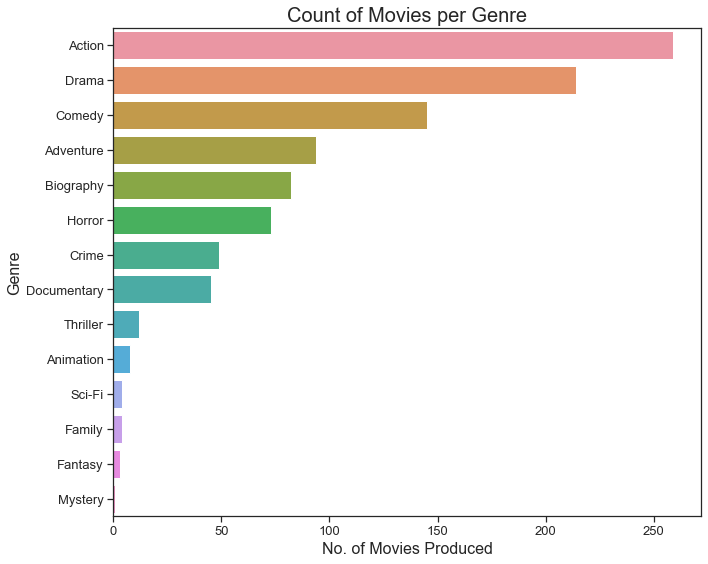

In [59]:
# setting size of the figure
plt.figure(figsize=(10,8))
# setting seaborn theme and plotting bar plot
sns.set_theme(style='ticks', palette='deep')
sns.barplot(x='count', y='genre', data=genres_df_sorted.head(14))
# setting x-axis and y-axis labels
plt.xlabel('No. of Movies Produced', fontsize=16)
plt.ylabel('Genre', fontsize=16)
# setting plot title
plt.title('Count of Movies per Genre', fontsize=20)
# setting x-axis and y-axis ticks fontsize
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# adjusting layout 
plt.tight_layout()
# saving the figure 
#plt.savefig('./fig1.png');

Action movies were the most produced genre according to the dataset. Other popular genres were drama, comedy and adventure movies. Next was to assess which genres had the best return on investment in terms of gross profits. Gross profit was determined by the difference between worldwide gross income and production budget. 

First step was to extract the first genre listed in every row of the genres column inorder to group production budgets and gross profits accordingly.

In [60]:
# applying a lambda function to the genres column to retrieve the first genre associated with a movie
imdb_bom_moviebudgets_df['genres'] = imdb_bom_moviebudgets_df['genres'].apply(lambda x: x.split(',')[0])
# previewing genres column
imdb_bom_moviebudgets_df['genres'].value_counts()


Action         259
Drama          214
Comedy         145
Adventure       94
Biography       82
Horror          73
Crime           49
Documentary     45
Thriller        12
Animation        8
Family           4
Sci-Fi           4
Fantasy          3
Mystery          1
Romance          1
Name: genres, dtype: int64

Next step was to convert values in the production budget, gross profits, worldwide, foreign and domestic gross  to millions using a lambda function.

In [61]:
# defining the lambda function
lambda_function = lambda x: x / 1000000
# applying lambda function to production budget, gross profits, 
# worldwide, foreign and domestic gross and creating new columns for values in millions
imdb_bom_moviebudgets_df['gross_profits_mil'] = imdb_bom_moviebudgets_df['gross_profit'].apply(lambda_function)
imdb_bom_moviebudgets_df['production_budget_mil'] = imdb_bom_moviebudgets_df['production_budget'].apply(lambda_function)
imdb_bom_moviebudgets_df['world_gross_mil'] = imdb_bom_moviebudgets_df['worldwide_gross'].apply(lambda_function)
imdb_bom_moviebudgets_df['dom_gross_mil'] = imdb_bom_moviebudgets_df['domestic_gross'].apply(lambda_function)
imdb_bom_moviebudgets_df['foreign_gross_mil'] = imdb_bom_moviebudgets_df['foreign_gross'].apply(lambda_function)
# previewing changes
imdb_bom_moviebudgets_df.head()

,title,genres,rating,domestic_gross,foreign_gross,release_year,release_date,production_budget,worldwide_gross,gross_profit,release_month,release_day,gross_profits_mil,production_budget_mil,world_gross_mil,dom_gross_mil,foreign_gross_mil
0,Jurassic World,Action,7.00,652270625,996584239,2015,2015-06-12,215000000,1648854864,1433854864,June,Friday,1433.85,215.00,1648.85,652.27,996.58
1,Alita: Battle Angel,Action,7.50,85710210,317265826,2019,2019-02-14,170000000,402976036,232976036,February,Thursday,232.98,170.00,402.98,85.71,317.27
2,Before We Go,Comedy,6.80,37151,446787,2015,2015-09-04,3000000,483938,-2516062,September,Friday,-2.52,3.00,0.48,0.04,0.45
3,Before We Go,Documentary,7.00,37151,446787,2015,2015-09-04,3000000,483938,-2516062,September,Friday,-2.52,3.00,0.48,0.04,0.45
4,The History of Love,Drama,6.30,0,476624,2016,2016-11-18,20000000,476624,-19523376,November,Friday,-19.52,20.00,0.48,0.00,0.48


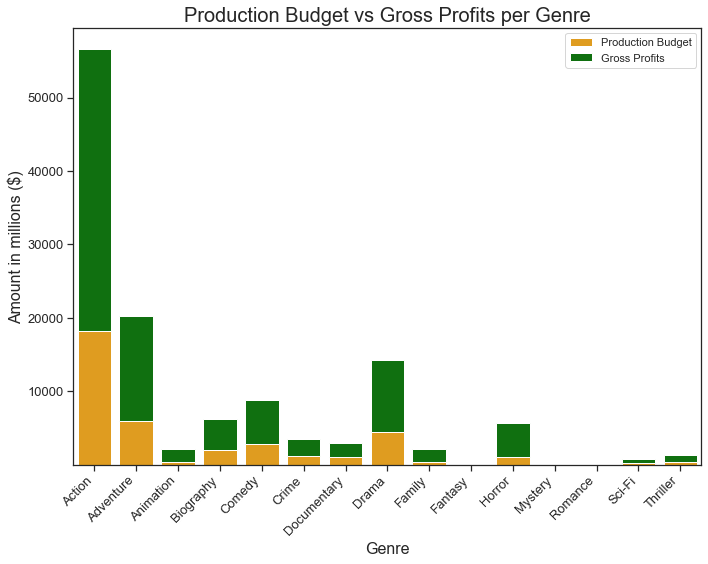

In [62]:
# grouping by genre and summing up production budgets and gross profits in million
grouped_df = imdb_bom_moviebudgets_df.groupby('genres')[['production_budget_mil', 'gross_profits_mil']].sum().reset_index()
# setting seaborn style
sns.set_theme(style='ticks')
# seting size of the figure
plt.figure(figsize=(10, 8))
# plotting stacked bar plot
sns.barplot(data=grouped_df, x='genres', y='production_budget_mil', label='Production Budget', color='orange')
sns.barplot(data=grouped_df, x='genres', y='gross_profits_mil', label='Gross Profits', color='green', 
            bottom=grouped_df['production_budget_mil'])
# setting x-axis and y-axis labels 
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Amount in millions ($)', fontsize=16)
# setting plot title
plt.title('Production Budget vs Gross Profits per Genre', fontsize=20)
# setting x-axis and y-axis ticks fontsize
plt.xticks(fontsize=13, rotation=45, ha='right')
plt.yticks(fontsize=13)
# setting legend
plt.legend()
# adjusting layout
plt.tight_layout()
# saving the figure 
#plt.savefig('./fig2.png');

Action movies continued to stand out by raking in the highest gross profits compared to production budget. This is even though action movies had significantly higher production budget.
Adventure films seemed to have almost the same production budget as dramas but they posted higher gross profits than dramas. Microsoft would do well to consider those three genres in order to see a sizeable return on their investment.

## Release day and month

Next I looked at how release timings affect the success of a film. I wanted to see how the release month and day of the week impacted how a movie would perform. 

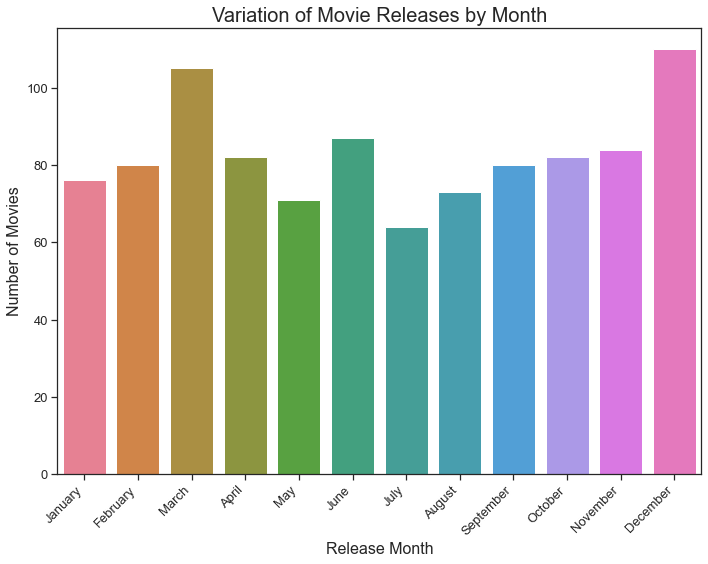

In [63]:
# getting value counts of release_month column 
months = imdb_bom_moviebudgets_df['release_month'].value_counts().reset_index()
# declaring month columns 
months.columns = ['Month', 'Number of Movies']
# setting seaborn theme
sns.set_theme(style='ticks')
# setting size of the figure
plt.figure(figsize=(10, 8))
# plotting bar plot of variation of movie releases by month 
sns.barplot(data=months, x='Month', y='Number of Movies', palette='husl',
           order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'])
# setting plot title
plt.title('Variation of Movie Releases by Month', fontsize=20)
# setting x-axis and y-axis labels
plt.xlabel('Release Month', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
# setting xticks format to prevent overlapping
plt.xticks(fontsize=13, rotation=45, ha='right')
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout()
# saving the figure 
#plt.savefig('./fig3.png');

Most releases occured in March and December with the lowest release months being July, January and May.

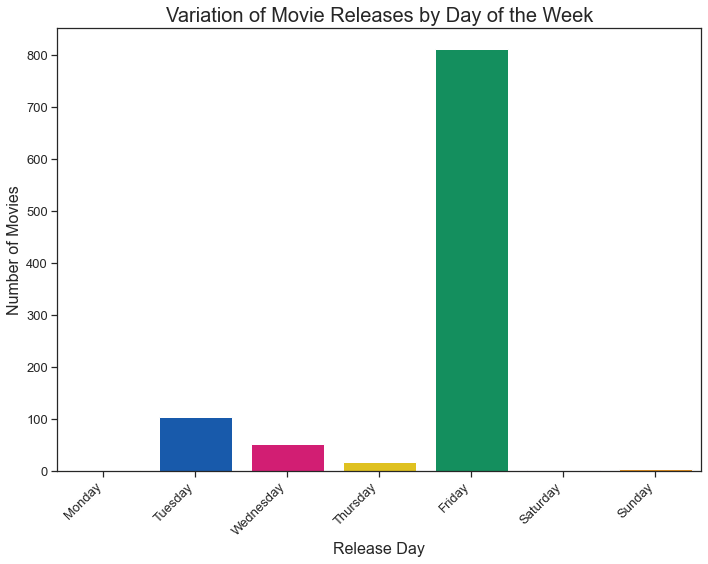

In [64]:
# getting value counts of release_day column 
days = imdb_bom_moviebudgets_df['release_day'].value_counts().reset_index()
# declaring columns 
days.columns = ['Day', 'Number of Movies']
# setting seaborn theme
sns.set_theme(style='ticks')
# settting size of the figure
plt.figure(figsize=(10, 8))
# plotting bar plot of variation of movie releases by day of the week 
sns.barplot(data=days, x='Day', y='Number of Movies', palette='prism',
           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# setting plot title
plt.title('Variation of Movie Releases by Day of the Week', fontsize=20)
# setting x-axis and y-axis labels
plt.xlabel('Release Day', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
# setting xticks format to avoid overlapping
plt.xticks(fontsize=13,rotation=45, ha='right')
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout();
# saving the figure 
#plt.savefig('./fig4.png');

Its no surprise that most movies are released on friday because studios aim to take advantage of the weekend box office. This gurantees a larger audience as majority of people have free time from friday evenings all through the weekend to watch new releases.

## Budget

Next I wanted to establish the relationship between production budget and how much a movie grossed domestically and worldwide. I decided to begin by creating a correlation heatmap to explore the correlation of financial variables within the dataset. 

In [65]:
# gettting the correlation matrix
corr_matrix = imdb_bom_moviebudgets_df.corr()
# previewing coorrlation matrix
corr_matrix

,rating,domestic_gross,foreign_gross,release_year,production_budget,worldwide_gross,gross_profit,gross_profits_mil,production_budget_mil,world_gross_mil,dom_gross_mil,foreign_gross_mil
rating,1.00,0.24,0.21,0.09,0.19,0.23,0.22,0.22,0.19,0.23,0.24,0.21
domestic_gross,0.24,1.00,0.88,0.14,0.71,0.95,0.94,0.94,0.71,0.95,1.00,0.88
foreign_gross,0.21,0.88,1.00,0.11,0.78,0.98,0.97,0.97,0.78,0.98,0.88,1.00
release_year,0.09,0.14,0.11,1.00,0.15,0.13,0.11,0.11,0.15,0.13,0.14,0.11
production_budget,0.19,0.71,0.78,0.15,1.00,0.78,0.66,0.66,1.00,0.78,0.71,0.78
worldwide_gross,0.23,0.95,0.98,0.13,0.78,1.00,0.99,0.99,0.78,1.00,0.95,0.98
gross_profit,0.22,0.94,0.97,0.11,0.66,0.99,1.00,1.00,0.66,0.99,0.94,0.97
gross_profits_mil,0.22,0.94,0.97,0.11,0.66,0.99,1.00,1.00,0.66,0.99,0.94,0.97
production_budget_mil,0.19,0.71,0.78,0.15,1.00,0.78,0.66,0.66,1.00,0.78,0.71,0.78
world_gross_mil,0.23,0.95,0.98,0.13,0.78,1.00,0.99,0.99,0.78,1.00,0.95,0.98


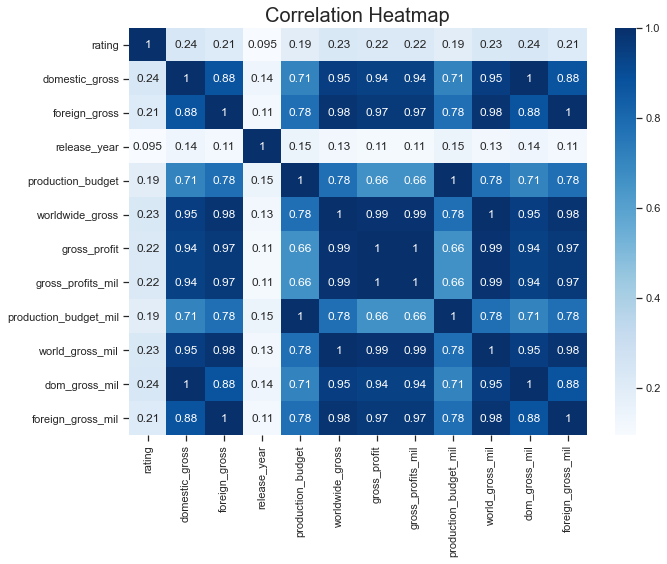

In [66]:
# setting size of the figure
plt.figure(figsize=(10,8))
# plotting correlation matrix heatmap and displaying correlation coefficient within the plot using annot
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
# setting plot title
plt.title('Correlation Heatmap', fontsize=20)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig5.png');

The heatmap showed a somewhat strong positive correlations between production budget and foreign and domestic gross. Gross profit had a strong positive correlation with domestic and foreign gross unsurprisingly. I decided to plot a stacked bar chart to see how foreign, domestic and worldwide gross varied per genre.

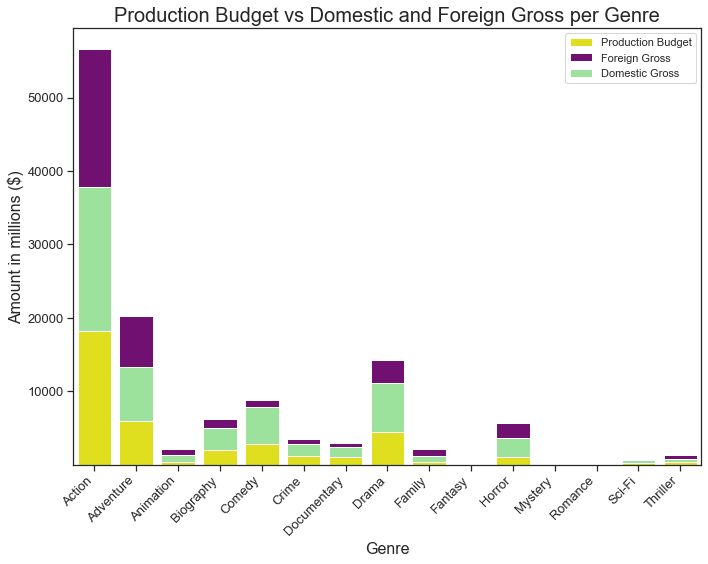

In [67]:
# grouping genres by sum of production budget, foreign and domestic gross
grouped_df_2 = imdb_bom_moviebudgets_df.groupby('genres')[['production_budget_mil', 'dom_gross_mil', 'foreign_gross_mil']].sum().reset_index()
# setting seaborn theme
sns.set_theme(style='ticks')
# setting size of the figure
plt.figure(figsize=(10, 8))
# plotting stacked bar plot
sns.barplot(data=grouped_df_2, x='genres', y='production_budget_mil', label='Production Budget', color='yellow')
sns.barplot(data=grouped_df_2, x='genres', y='foreign_gross_mil', label='Foreign Gross', color='purple', 
            bottom=grouped_df_2['dom_gross_mil'])
sns.barplot(data=grouped_df_2, x='genres', y='dom_gross_mil', label='Domestic Gross', color='lightgreen', 
            bottom=grouped_df_2['production_budget_mil'])
# setting x-axis and y_axis labels 
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Amount in millions ($)', fontsize=16)
# setting plot title
plt.title('Production Budget vs Domestic and Foreign Gross per Genre', fontsize=20)
# setting xticks and yticks format
plt.xticks(fontsize=13, rotation=45, ha='right')
plt.yticks(fontsize=13)
# setting plot legend
plt.legend()
# adjusting layout
plt.tight_layout()
# saving the figure
#plt.savefig('./fig6.png');

From the stacked bar chart I inferred that action movies being the most produced genre had highest production budgets and in turn made more money in both domestic and foreign markets. Sci-Fi movies, thrillers,family and animation, romance and fantasy movies were generally not produced as frequently as drama, adventure and comedy hence their values were significanly less.

Next I decided to see how changes in production budget affected the worldwide gross of the top 3 genres as per their production budget to gross income ratios depicted above.

<Figure size 720x576 with 0 Axes>

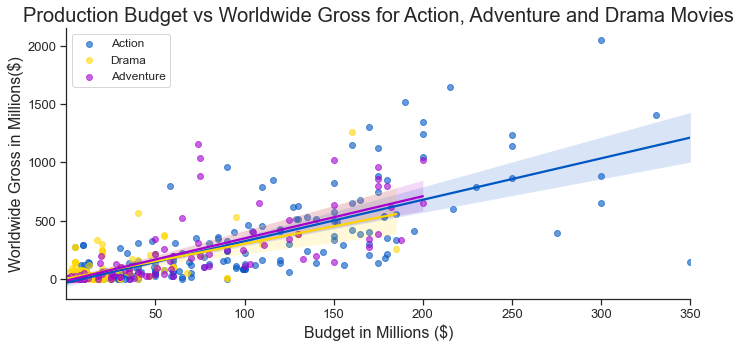

In [68]:
# setting size of the figure
plt.figure(figsize=(10,8))
# setting seaborn style
sns.set_style('ticks')
# plotting linear model plot
sns.lmplot(x='production_budget_mil', y='world_gross_mil', 
           data=imdb_bom_moviebudgets_df.loc[(imdb_bom_moviebudgets_df['genres']=='Action') | 
                                             (imdb_bom_moviebudgets_df['genres']=='Adventure')|
                                             (imdb_bom_moviebudgets_df['genres']=='Drama')],
                                             legend=False, hue='genres', aspect=2,palette='prism',
                                             scatter_kws={'alpha': 0.6})
# setting x-axis and y-axis labels
plt.xlabel('Budget in Millions ($)', fontsize=16)
plt.ylabel('Worldwide Gross in Millions($)', fontsize=16)
# setting plot title
plt.title('Production Budget vs Worldwide Gross for Action, Adventure and Drama Movies', fontsize=20)
# setting xticks and yticks format
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# setting legend
plt.legend(loc=2, fontsize=12)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig7.png');

From this regression plot I inferred that lower production budgets translated to lower worldwide gross earnings in most cases. The outliers in the plot mostly represent films that performed exceptionally well or poorly relative to their production budgets. Overall, the general trend was that the higher the production budget, the higher the worldwide gross and the higher the potential return on investment. Vice versa is also true.

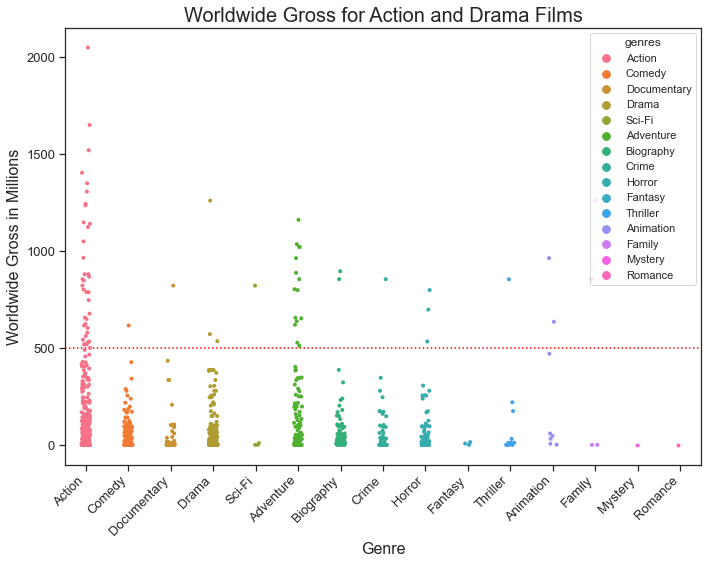

In [69]:
# setting size of the figure
plt.figure(figsize=(10, 8))
# setting seaborn style
sns.set_style('ticks')
# plotting strip plot
sns.stripplot( x='genres', y="world_gross_mil", data=imdb_bom_moviebudgets_df, 
              hue='genres', s=4, palette='husl')
# seting x-axis and y-axis labels
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Worldwide Gross in Millions', fontsize=16)
# setting plot title
plt.title('Worldwide Gross for Action and Drama Films', fontsize=20)
# setting horizontal line on y=500
plt.axhline(y=500, c='red', ls=':')
# setting xticks and yticks format
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig8.png');

Action and adventure films show alot of promise in terms of how much they gross worldwide so next was to find out the median production budget and worldwide gross of all the genres.

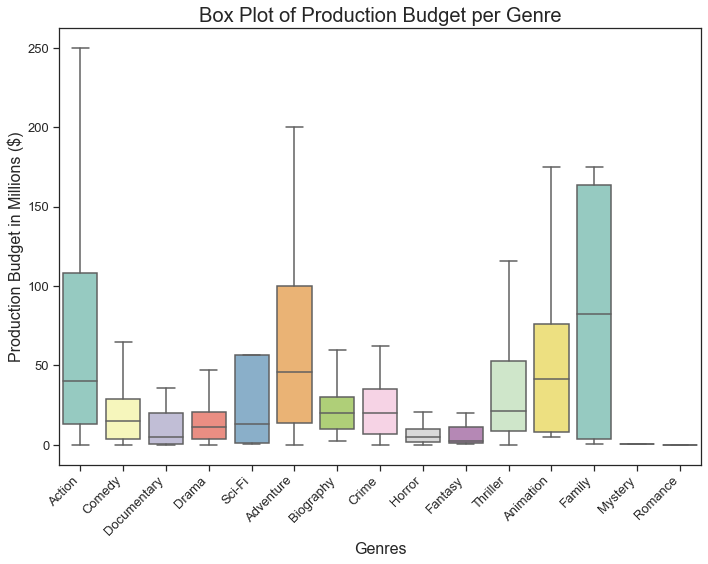

In [70]:
# setting size of the figure
plt.figure(figsize=(10, 8))
# setting seaborn style
sns.set_style('ticks')
# ploting boxplot
sns.boxplot(x='genres', y='production_budget_mil', data=imdb_bom_moviebudgets_df, palette='Set3', showfliers=False)
# setting x-axis and y-axis labels
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Production Budget in Millions ($)', fontsize=16)
# setting plot title
plt.title('Box Plot of Production Budget per Genre', fontsize=20)
# setting xticks and yticks format
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig9.png');

The median production budget of family movies appeared to be the highest followed by animation, action and adventure movies. The boxplot also showed that the family genre had the highest interquartile range meaning that there was a large variance in family movie production budgets from the mean of the dataset and that they had relatively high median budgets. Action movies and adventure movies also depicted high interquartile ranges but significantly lower production budget median values as compared to family type movies. 

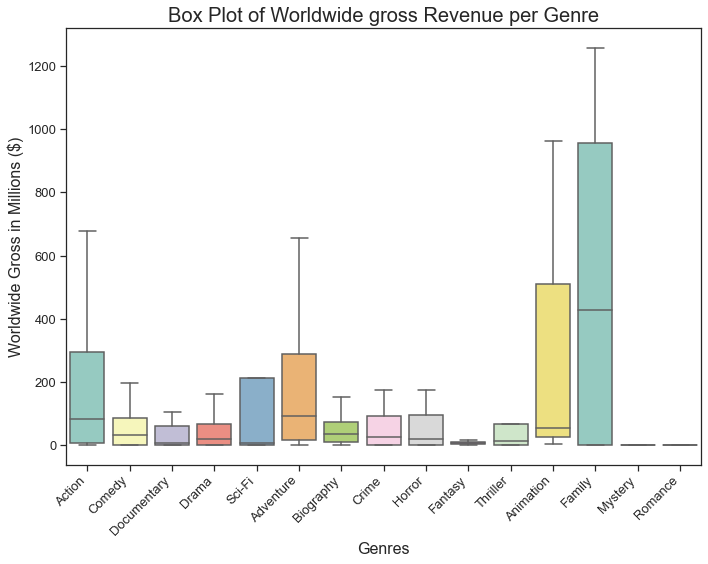

In [71]:
# setting size of the figure
plt.figure(figsize=(10, 8))
# setting seaborn style
sns.set_style=('ticks')
# ploting boxplot
sns.boxplot(x='genres', y='world_gross_mil', data=imdb_bom_moviebudgets_df, palette='Set3', showfliers=False)
# setting x-axis and y-axis labels
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Worldwide Gross in Millions ($)', fontsize=16)
# setting plot title
plt.title('Box Plot of Worldwide gross Revenue per Genre', fontsize=20)
# setting xticks and yticks format
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig10.png');

From this plot we can conclude that family movies appear very promising in terms of worldwide gross as they also present a high median value in comparison to the other genres. Action and adventure films follow closely but I suspected that the values were being affected by outliers so I proceeded to visualize the box plot with outliers.

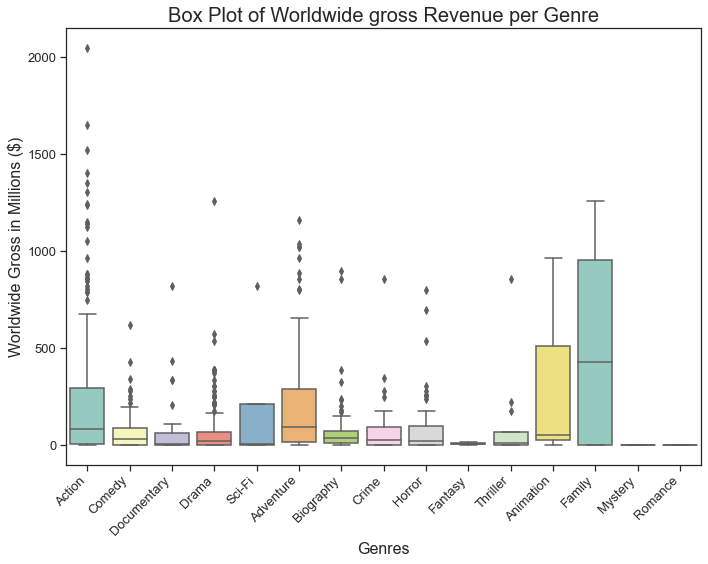

In [72]:
# setting size of the figure
plt.figure(figsize=(10, 8))
# setting seaborn style
sns.set_style=('ticks')
# ploting boxplot
sns.boxplot(x='genres', y='world_gross_mil', data=imdb_bom_moviebudgets_df, palette='Set3')
# setting x-axis and y-axis labels
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Worldwide Gross in Millions ($)', fontsize=16)
# setting plot title
plt.title('Box Plot of Worldwide gross Revenue per Genre', fontsize=20)
# setting xticks and yticks format
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig11.png');

My guess was right. The action and adventure genres did possess a number of outliers and so did all the other genres except for family, animation and fantasy. The family genre continued to look very promising as a genre to invest in terms of median worldwide gross but more research was required in order to make the best informed decision.

The final step was to look at the top grossing movies worldwide per year in the action, adventure and drama categories. This would guide decisions about what actors, directors, producers, crew, agents and PR teams to engage in order to create a winning film.

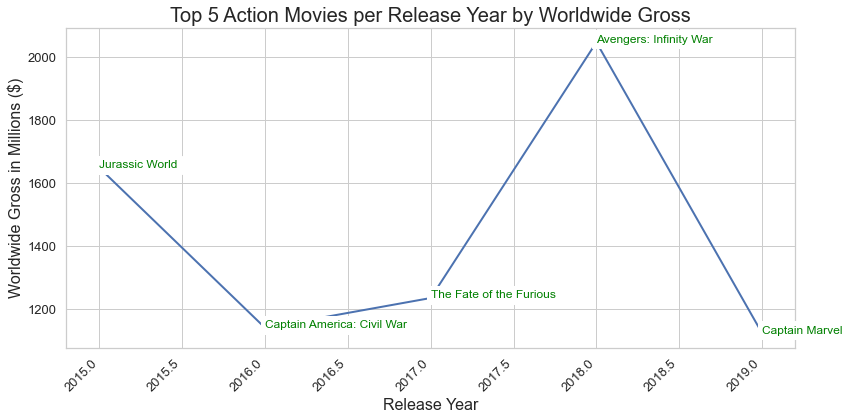

In [73]:
# creating new dataframe of action movies
action_movies_df = imdb_bom_moviebudgets_df[imdb_bom_moviebudgets_df['genres'] == 'Action']
# grouping by release year and getting sum of worldwide gross
action_grouped_df = action_movies_df.groupby('release_year')['world_gross_mil'].max().reset_index()
# sorting data to identify top 10 action movies per year
top_action_movies= (action_movies_df.sort_values(by='world_gross_mil', ascending=False)
                    .groupby('release_year').head(1))
# setting size of the figure
plt.figure(figsize=(12, 6))
# setting seaborn style
sns.set(style='whitegrid')
# plotting line plot
sns.lineplot(data=action_grouped_df, x='release_year', y='world_gross_mil', marker='o', lw=2)
# iterating through each row of top action movies annoting top action movie per year
for i , row in top_action_movies.iterrows():
    plt.text(row['release_year'], row['world_gross_mil'], row['title'], 
             horizontalalignment='left', fontsize=12, color='green',).set_backgroundcolor('white')
# setting x-axis and y-axis labels
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Worldwide Gross in Millions ($)', fontsize=16)
# setting plot title 
plt.title('Top 5 Action Movies per Release Year by Worldwide Gross', fontsize=20)
# setting xticks and yticks format
plt.xticks(rotation=45, ha='right',fontsize=13)
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig12.png');

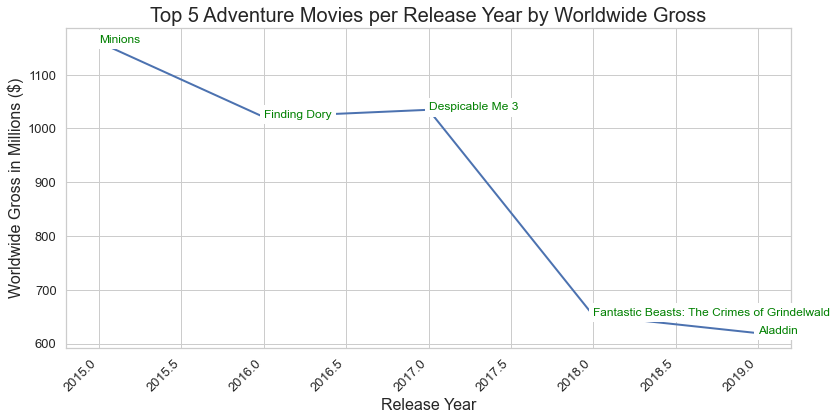

In [74]:
# creating new dataframe of action movies
adventure_movies_df = imdb_bom_moviebudgets_df[imdb_bom_moviebudgets_df['genres'] == 'Adventure']
# grouping by release year and getting sum of worldwide gross
adv_grouped_df = adventure_movies_df.groupby('release_year')['world_gross_mil'].max().reset_index()
# sorting data to identify top 10 action movies per year
top_adventure_movies= (adventure_movies_df.sort_values(by='world_gross_mil', ascending=False)
                    .groupby('release_year').head(1))
# setting size of the figure
plt.figure(figsize=(12, 6))
# setting seaborn style
sns.set(style='whitegrid')
# plotting line plot
sns.lineplot(data=adv_grouped_df, x='release_year', y='world_gross_mil', marker='o', lw=2)
# iterating through each row of top action movies annoting top action movie per year
for i , row in top_adventure_movies.iterrows():
    plt.text(row['release_year'], row['world_gross_mil'], row['title'], 
             horizontalalignment='left', fontsize=12, color='green',).set_backgroundcolor('white')
# setting x-axis and y-axis labels
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Worldwide Gross in Millions ($)', fontsize=16)
# setting plot title 
plt.title('Top 5 Adventure Movies per Release Year by Worldwide Gross', fontsize=20)
# setting xticks and yticks format
plt.xticks(rotation=45, ha='right',fontsize=13)
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig13.png');

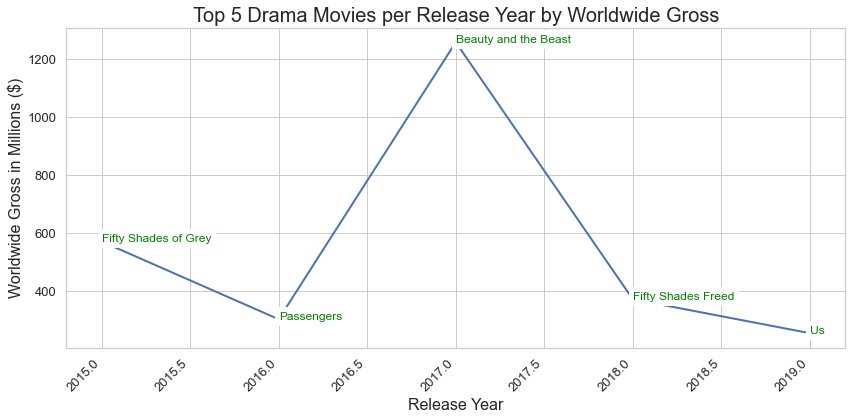

In [75]:
# creating new dataframe of action movies
drama_movies_df = imdb_bom_moviebudgets_df[imdb_bom_moviebudgets_df['genres'] == 'Drama']
# grouping by release year and getting sum of worldwide gross
drama_grouped_df = drama_movies_df.groupby('release_year')['world_gross_mil'].max().reset_index()
# sorting data to identify top 10 action movies per year
top_drama_movies= (drama_movies_df.sort_values(by='world_gross_mil', ascending=False)
                    .groupby('release_year').head(1))
# setting size of the figure
plt.figure(figsize=(12, 6))
# setting seaborn style
sns.set(style='whitegrid')
# plotting line plot
sns.lineplot(data=drama_grouped_df, x='release_year', y='world_gross_mil', marker='o', lw=2)
# iterating through each row of top action movies annoting top action movie per year
for i , row in top_drama_movies.iterrows():
    plt.text(row['release_year'], row['world_gross_mil'], row['title'], 
             horizontalalignment='left', fontsize=12, color='green',).set_backgroundcolor('white')
# setting x-axis and y-axis labels
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Worldwide Gross in Millions ($)', fontsize=16)
# setting plot title 
plt.title('Top 5 Drama Movies per Release Year by Worldwide Gross', fontsize=20)
# setting xticks and yticks format
plt.xticks(rotation=45, ha='right',fontsize=13)
plt.yticks(fontsize=13)
# adjusting layout
plt.tight_layout()
# saving figure
#plt.savefig('./fig14.png');

## CONCLUSIONS

Microsoft stands a great chance at breaking into the movie industry by taking into consideration these three factors:

* Genre - The top 5 most produced genres in the movie industry are acttion, drama, comedy, adventure and biographies. These depict genres that have been tried and tested as being popular with a wide variety of masses. If microsoft focuses its attention on these genres they are guaranteed to successfully attract audiences the world over and break into the movie scene in an earth-shattering way.

* Release day - Microsoft should aim to release their movies on fridays for maximum success. Friday being the end of the week makes it the most ideal period for moviegoers to visit theatres and watch new movie releases. Many movie studios strategically choose Fridays for releases to maximize box office earnings. This is because movies have more time to attract larger audiences and generate higher revenue. By creating buzz in the days before the day of release, a movie is guaranteed great success.

* Release month - The period between March to June is very popular with movie releases and according to research, many critically acclaimed films that win at the Oscars are released in March and April. This can be a contributing factor to Microsoft's success. May to August also witnesses a rise in movie releases as movie studios count on the summer months to take advantage of the larger audience and school vacations. Summer break also means that families have more opportunities to go out for entertainment. Family films have a better opportunity when released from late November to December as this is the period of holidays such as Thanksgiving, Christmas, and New Year. The festive spirit means that families have a higher likelihood of going to movies together thus making it a good time for family-oriented films.

* Budget - My analysis has shown that the more money that is put into producing a film, the more money there stands to be made in terms of domestic and foreign revenue. Less investment into producing a film will mean that production quality will be compromised. A higher budget will enable a movie studio to enlist top-tier actors, invest in high-quality special effects and CGI, create elaborate sets and producee captivating cinematography for its audience. This will have the domino effect of attracting more viewers. A larger budget will also enable effective marketing and promotional campaigns creating buzz and generating anticipation among audiences leading to higher ticket sales across multiple theaters both domestically and internationally. 

## RECOMMENDATIONS

I would recommend that Microsoft do the following:
* Produce an action film preferably a superhero movie seeing as three of the five top grossing action films worldwide between 2015 and 2019 are superhero movies. They should aim for a production budget of between 150 to 300 million dollars and aim to release the movie between March and June. This is the best time period for a demographic that enjoys superhero action films. Microsoft should also enlist a top-grossing superhero movie director for their premier film. As worlwide gross income numbers are to go by, they should work with the Russo brothers (Anthony and Joseph Russo) who are the directors of the movie Avengers: Infinity War.

* Microsoft should also aim to produce an adventure movie going by budget to worldwide gross income ratio. The top three adventure movies between 2015 and 2019 are animation comedy adventure films that appeal to younger and older audiences. This movie should be released between May and July during school summer breaks guaranteeing a massive audience of kids and parents alike. The production budget should be set around the median which is between 70 to 100 million dollars. Microsoft should also aim to enlist top animation producers such as Pierre Coffin who has directed both Minions and Despicable Me, Kyle Balda from Minions or Andrew Stanton from Finding Dory. 

* Microsoft can also produce a romantic drama going by 3 of the top 5 drama movies in the 2015 to 2019 time period. Two of these are the Fifty Shades franchise so Microsooft can enlist top directors proficient in the genre. Some of them are James Foley from Fifty Shades Freed and Morten TTyldum from the movie Passengers. The production budget should be between 50 and 100 million dollars.


## NEXT STEPS

* Invest in the best producers, screenwriters, actors and cinematographers per genre in the recommendations.
* Get the best suited sound, design, costumes and art crew for each movie.
* Invest in the highest quality sound, music, visual and special effects software and hardware in the market to ensure the best quality of production.
* Enlist the best PR and marketing firms to boost advertising, marketing and distribution of their upcoming films.
* Research on the feasibility and viability of producing a family film.


## REFERENCES

<a href="https://www.freepik.com/free-vector/film-crew-movie-production-studio-staff_29314759.htm#fromView=search&page=1&position=8&uuid=1c379553-fabc-44ff-a8ab-f4c3d5519362">Image by upklyak on Freepik</a>